In [1]:
# Importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn.impute import KNNImputer

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',40)
sns.set(style='whitegrid')

In [2]:
# Load Tarin Data
train=pd.read_csv('train.csv')
# Load Test Data
test=pd.read_csv('test.csv')

# Combine the training and test datasets into a single DataFrame
data=pd.concat([train,test],ignore_index=True)

In [3]:
# Display first 5 rows of combined Data
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
# Display shape of Data
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset has 150000 rows and 28 columns.


In [5]:
# Display a summary of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [6]:
# Get summary statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,127500.0,4190.115139,3180.489657,303.645417,1625.265833,3091.000000,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,17.006940,117.069476,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,150000.0,22.623447,129.143006,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,150000.0,71.234907,461.537193,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,150000.0,21.063400,14.860154,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,147000.0,28.529014,194.456058,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,150000.0,32.283309,5.113315,20.000000,28.054731,32.297058,36.487954,50.000000
Total_EMI_per_month,150000.0,1432.513579,8403.759977,0.000000,30.947775,71.280006,166.279555,82398.000000


In [7]:
# Get summary statistics for categorical columns
data.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1602,1
Customer_ID,150000,12500,CUS_0xd40,12
Month,150000,12,January,12500
Name,135000,10139,Stevex,66
Age,150000,2524,39,4198
SSN,150000,12501,#F%$D@*&8,8400
Occupation,150000,16,_______,10500
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112


In [8]:
# Show values and value count of columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("**"*20)
    print(data[col].value_counts())
    print("--"*20, '\n')


Column: ID
****************************************
ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: count, Length: 150000, dtype: int64
---------------------------------------- 


Column: Customer_ID
****************************************
Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: count, Length: 12500, dtype: int64
---------------------------------------- 


Column: Month
****************************************
Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64
---------------------------------------- 


Column: Nam

In [9]:
# A function for removing symboles in Data
def text_cleaning(data):
  """
    Cleans a given text data by:
    - Returning the data as-is if it is NaN or not a string.
    - Otherwise, converting the data to a string and removing unwanted characters
      such as leading/trailing underscores ('_'), spaces (' '), commas (','), and double quotes ('"').

    Args:
        data: The input data to clean, which can be of any type.

    Returns:
        The cleaned string if the input is a valid string, or the original data if it is NaN or not a string.
    """

  if data is np.NaN or not isinstance(data, str): #  Check if data is NaN or not a string.
        return data #  Return the data without modification.
  else:
        return str(data).strip('_ ,"')  # Convert to string and remove specific leading/trailing characters.

In [10]:
# Apply the text_cleaning function to every element in the DataFrame
# and replace invalid values with NaN.
data = data.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [11]:
# Check what columns are wrong formated as 'object'
object_columns = data.select_dtypes(include='object').columns
print(f"Columns with object dtype: {object_columns}")

Columns with object dtype: Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [12]:
# Ensure proper formatting of numerical columns by converting them to their intended data types

data['Age']                     = data.Age.astype(int)                          # Convert to integer for age
data['Num_of_Loan']             = data.Num_of_Loan.astype(int)                  # Convert to integer for loan count
data['Num_Bank_Accounts']       = data.Num_Bank_Accounts.astype(int)            # Convert to integer for account count
data['Annual_Income']           = data.Annual_Income.astype(float)              # Convert to float for precise income values
data['Changed_Credit_Limit']    = data.Changed_Credit_Limit.astype(float)       # Convert to float for credit limit changes
data['Outstanding_Debt']        = data.Outstanding_Debt.astype(float)           # Convert to float for outstanding debt
data['Amount_invested_monthly'] = data.Amount_invested_monthly.astype(float)    # Convert to float for monthly investments
data['Monthly_Balance']         = data.Monthly_Balance.astype(float)            # Convert to float for monthly balances
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'],  # Convert to numeric for delayed payment count
                                               errors='coerce')

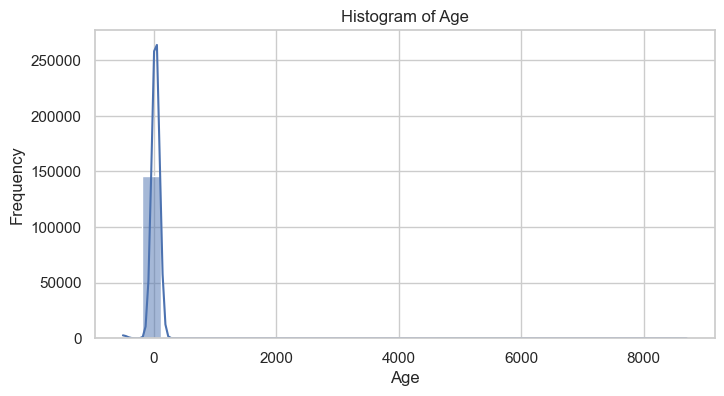

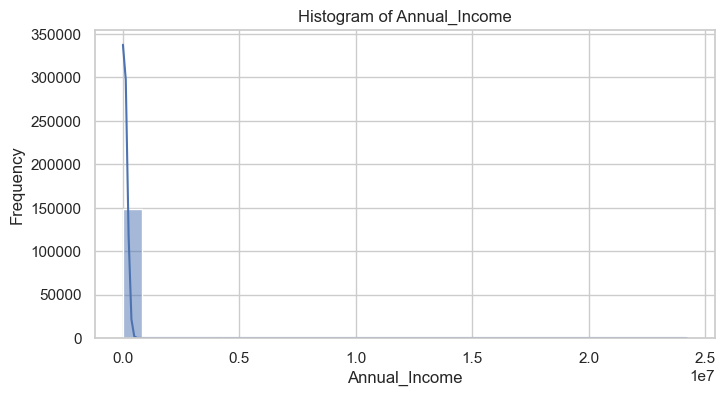

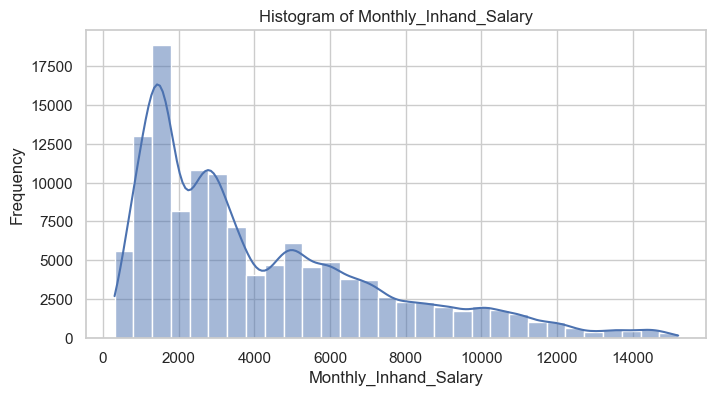

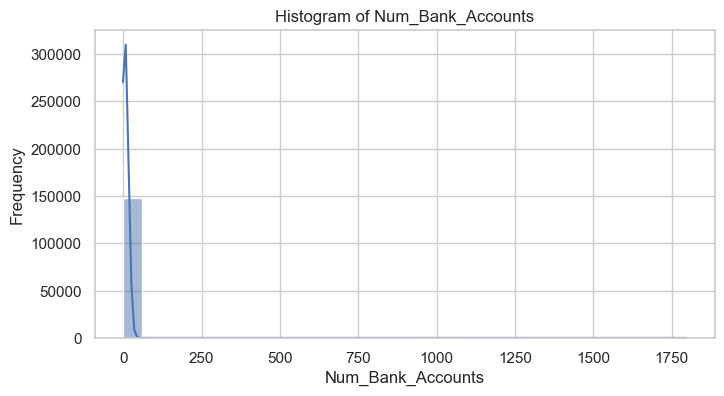

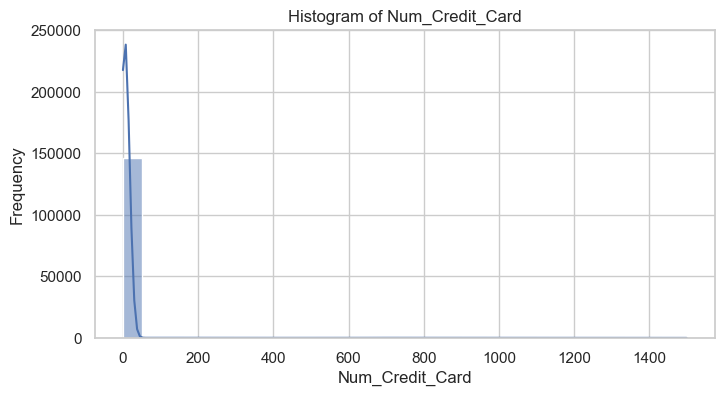

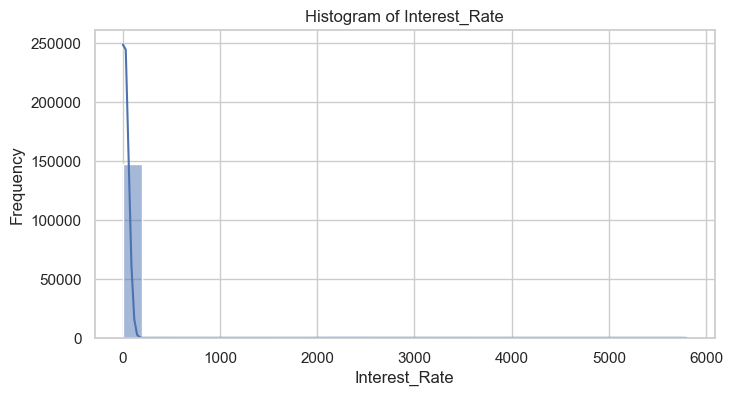

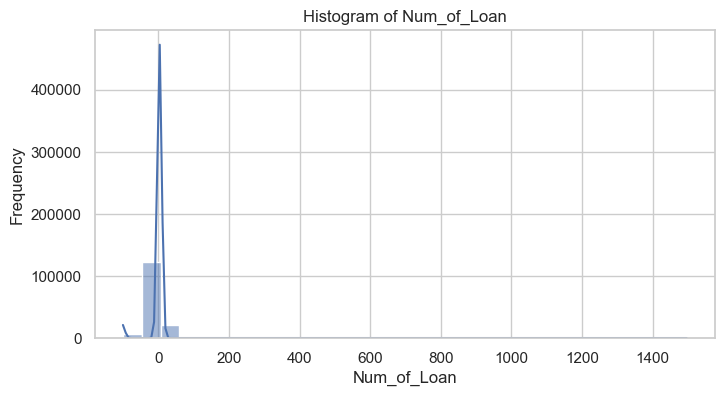

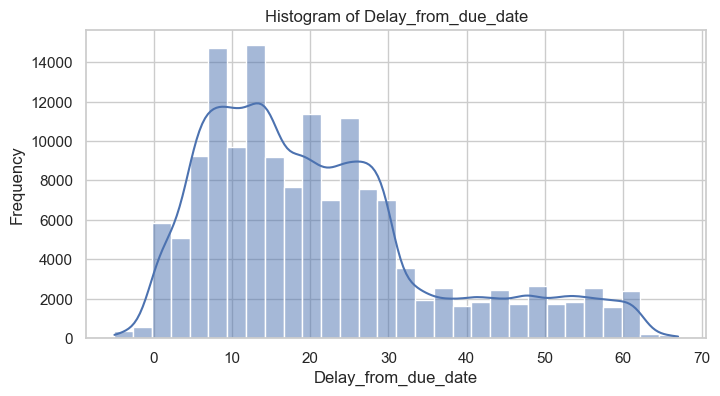

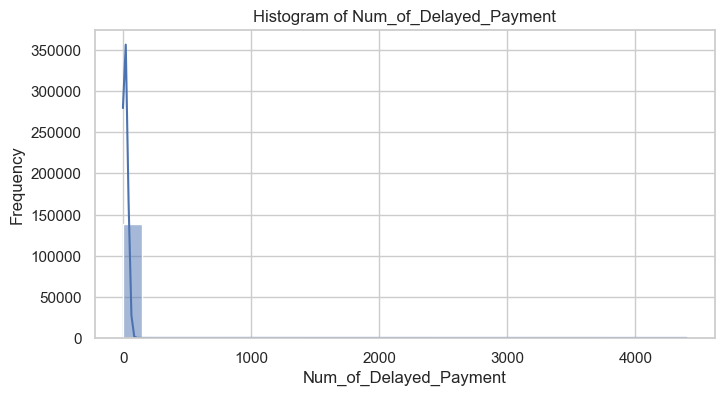

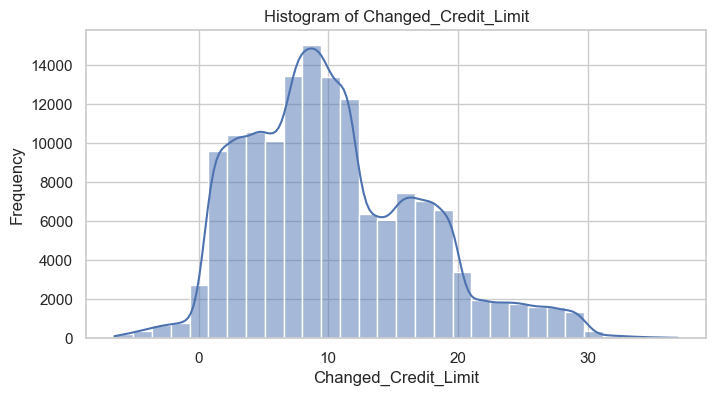

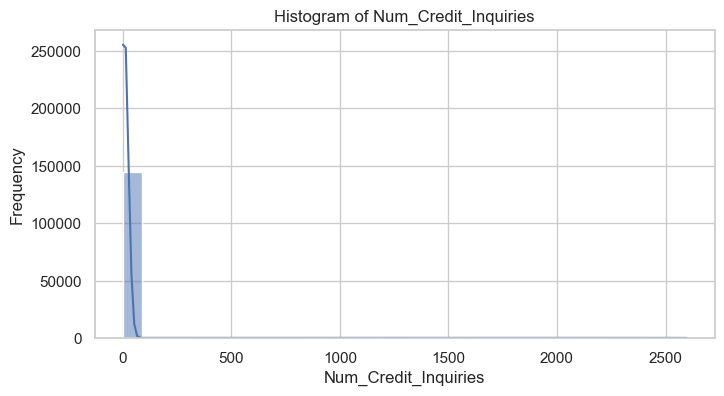

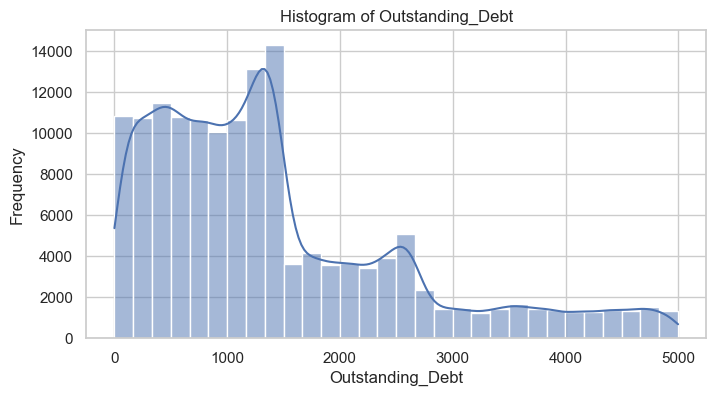

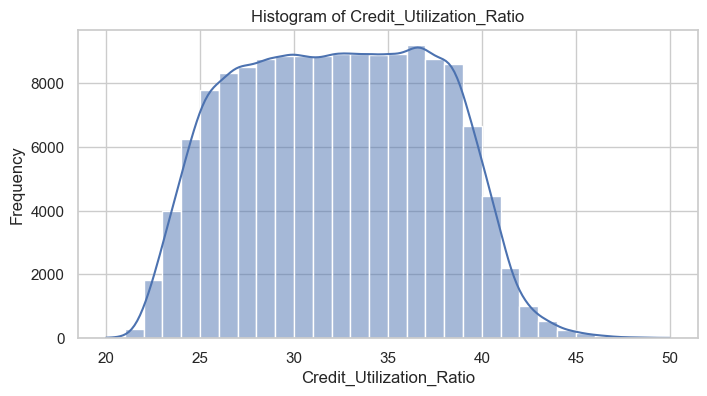

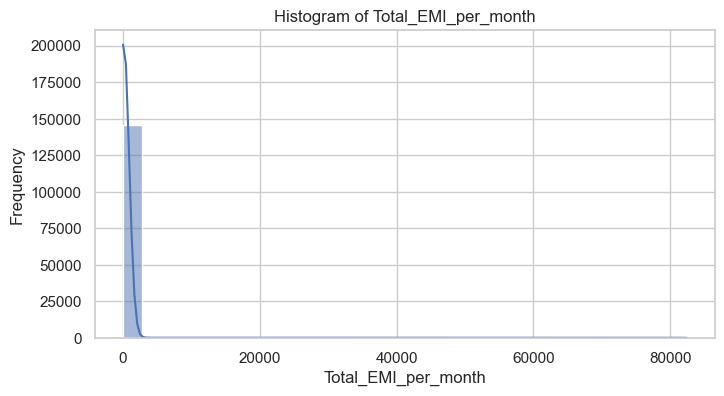

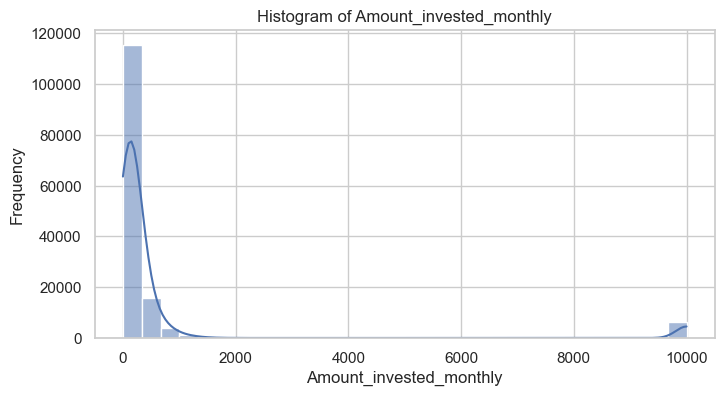

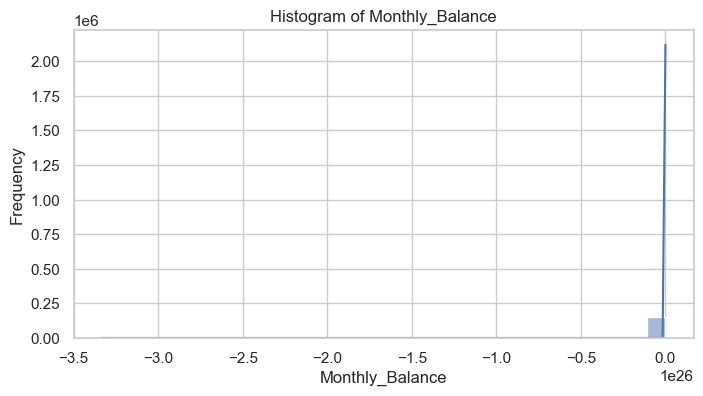

In [13]:
# Select numeric columns from the DataFrame
numeric_columns = data.select_dtypes(include='number').columns

# Iterate over each numeric column
for col in numeric_columns:
    # Create a new figure for each column with specified size
    plt.figure(figsize=(8, 4))

    # Create a histogram with a kernel density estimate (KDE) for the current numeric column
    sns.histplot(data[col], bins=30, kde=True)

    # Set the title of the plot to indicate which column is being visualized
    plt.title(f'Histogram of {col}')

    # Label the x-axis with the name of the numeric column
    plt.xlabel(col)

    # Label the y-axis with 'Frequency' to represent the count of occurrences
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

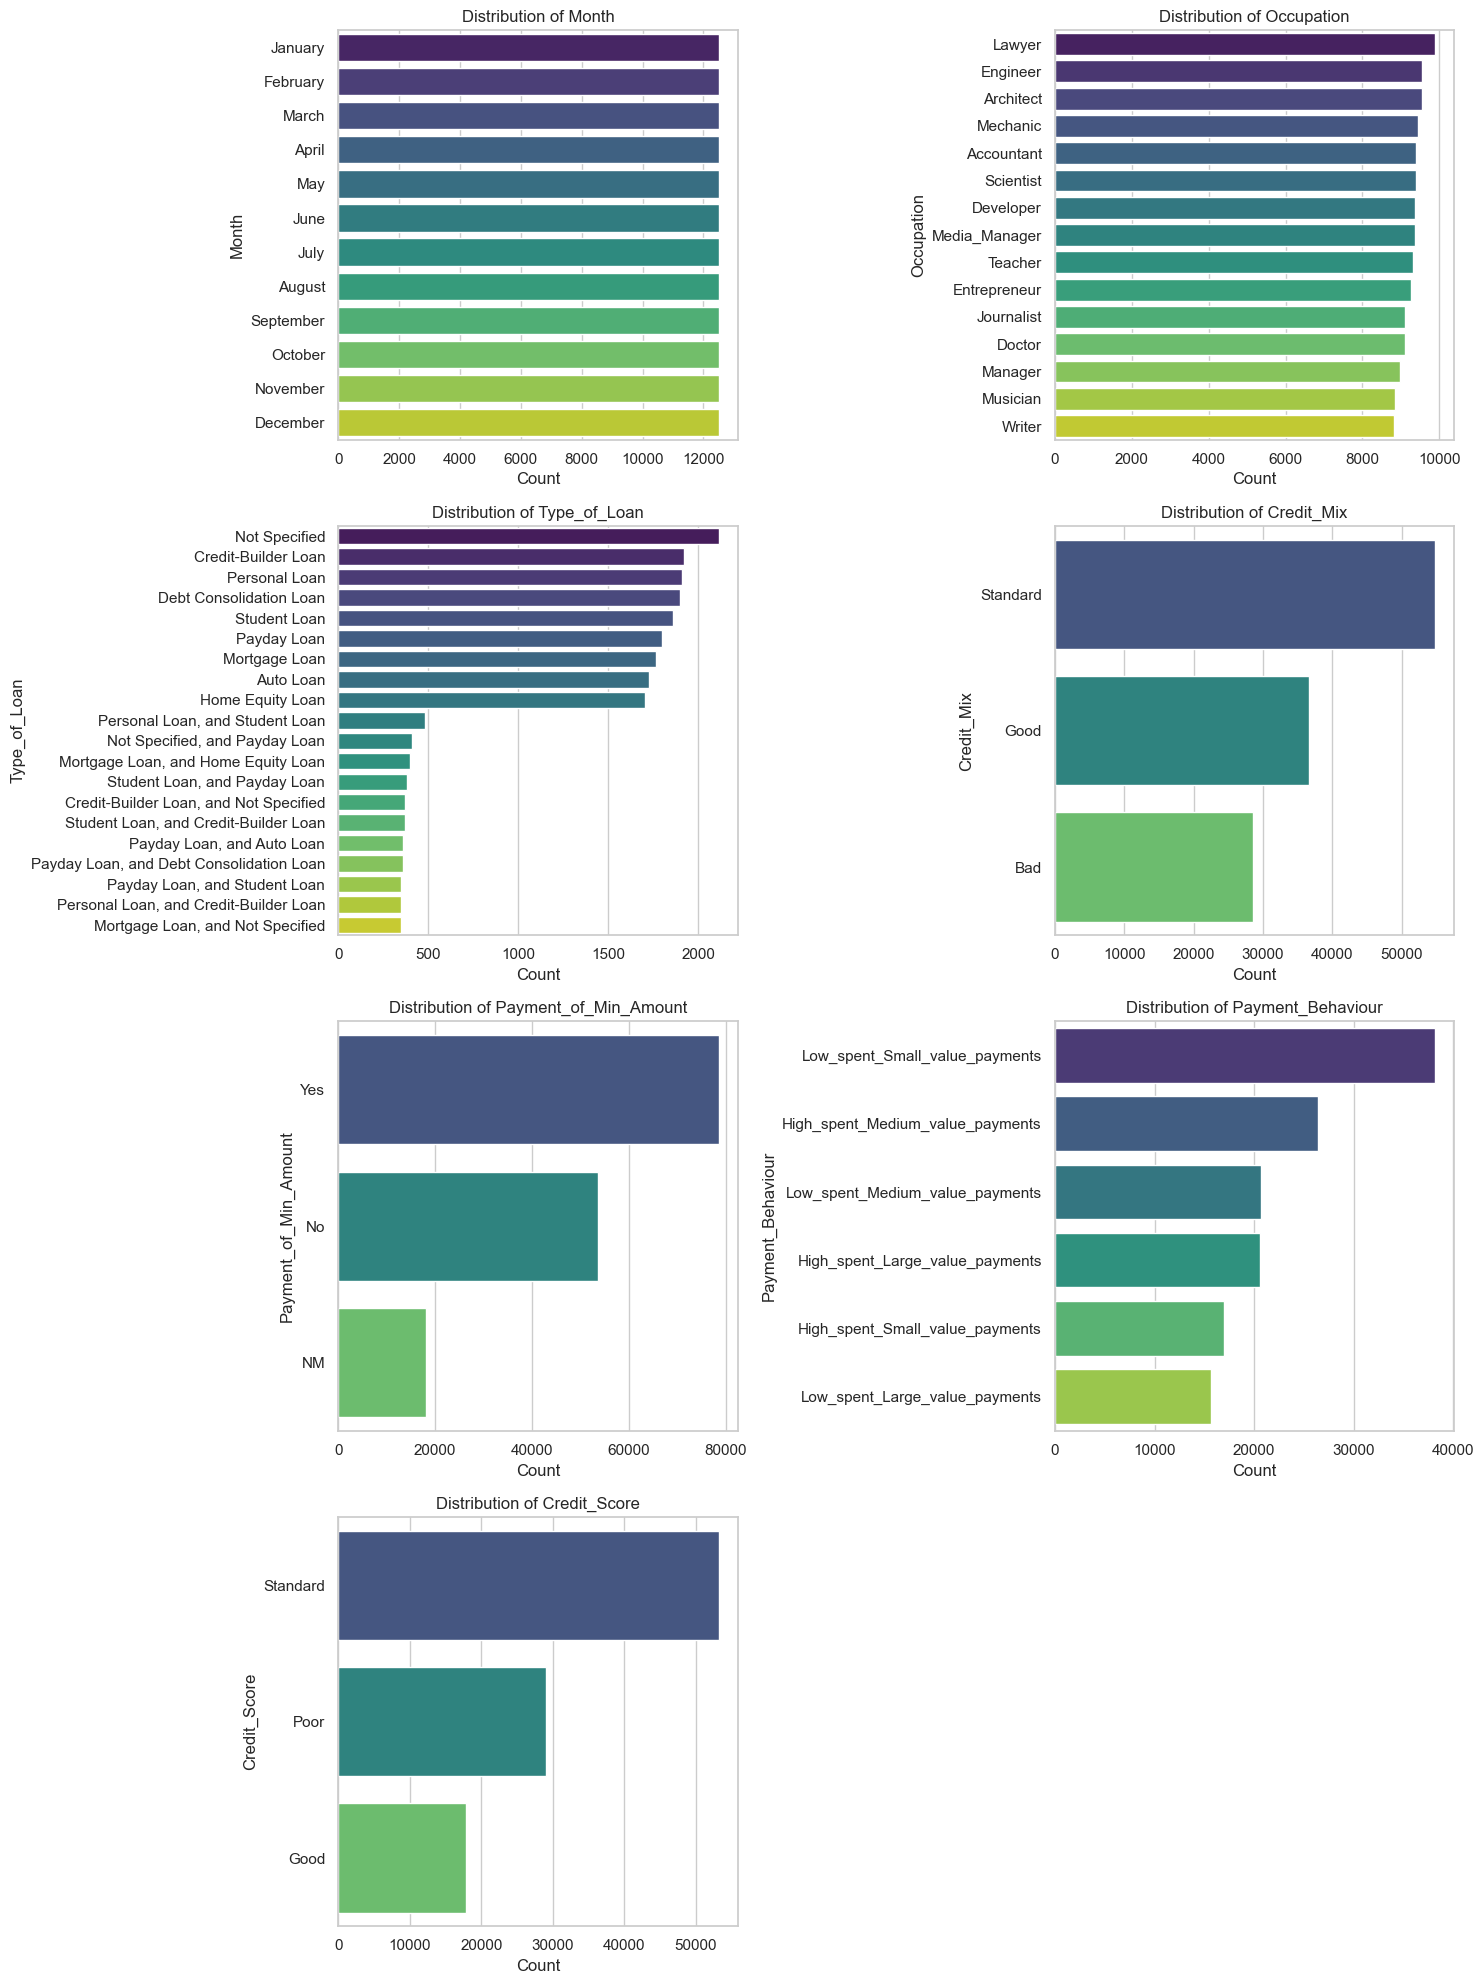

In [14]:
# Specify categorical columns
categorical_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
                    'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Determine grid layout
n_cols = 2
n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division for rows

# Set up the figure size
plt.figure(figsize=(15, 5 * n_rows))

# Create subplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    order = data[col].value_counts().index[:min(20, len(data[col].unique()))]  # Top 10 or fewer categories
    sns.countplot(y=col, data=data, order=order, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [15]:
# Check number of Loan types in the data
data.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                                                         2112
Credit-Builder Loan                                                                                                                   1920
Personal Loan                                                                                                                         1908
Debt Consolidation Loan                                                                                                               1896
Student Loan                                                                                                                          1860
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                12
Payday Loan, M

In [16]:
# Define the mapping for loan types
mapping_priority = [
    'not specified',
    'credit-builder loan',
    'personal loan',
    'consolidation loan',
    'student loan'
]

# Function to select a single value from multi-value loan types
def map_loan_types(loan_types):
    if pd.isna(loan_types):
        return loan_types  # Return NaN as is
    # Split by commas and convert to lowercase
    loans = re.split(r',| and ', loan_types.lower())
    # Find the first matching value based on mapping priority
    for priority in mapping_priority:
        if any(priority in loan.strip() for loan in loans):
            return priority
    return 'other'  # Fallback value if no mapping is found

# Apply the mapping function to the original column
data['Type_of_Loan'] = data['Type_of_Loan'].apply(map_loan_types)

In [17]:
# Ckeck unique Values after mapping
data['Type_of_Loan'].unique()

array(['credit-builder loan', 'not specified', nan, 'personal loan',
       'other', 'consolidation loan', 'student loan'], dtype=object)

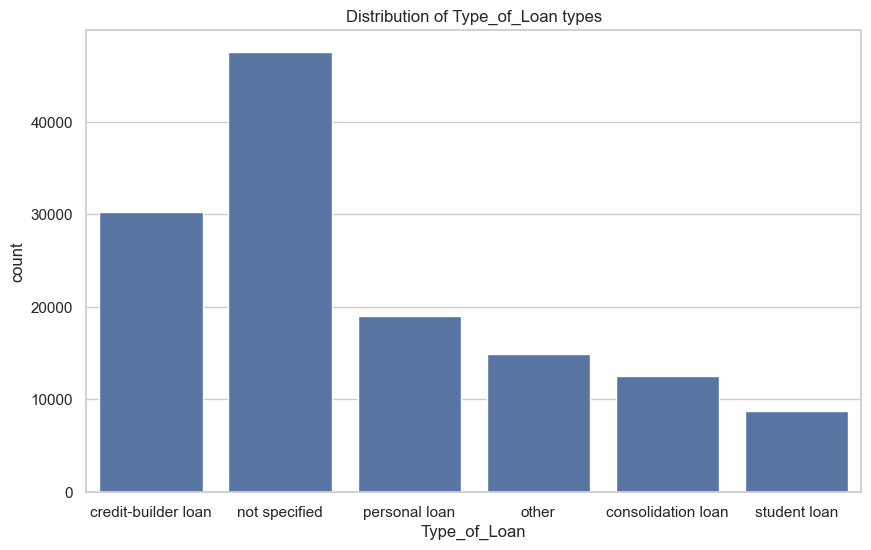

In [18]:
# Analyze distribution of 'Type_of_Loan' after mapping
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type_of_Loan')
plt.title('Distribution of Type_of_Loan types')
plt.show()

In [19]:
# Check for missing values in the dataset
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

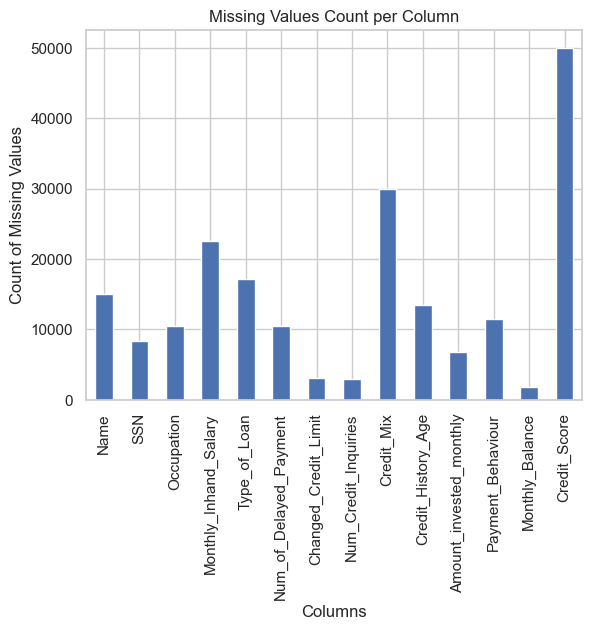

In [20]:
# Plot count of missing values
missing_counts = data.isnull().sum()
missing_counts[missing_counts > 0].plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.show()

In [21]:
# As Customer_ID is not null, we can use it as a unique identifier for our data.
# This ensures that each Customer in the dataset can be uniquely identified by the Customer_ID.
# Setting Customer_ID as the index
data = data.set_index('Customer_ID')

In [22]:
# Group by 'Customer_ID' and apply ffill
# Exclude 'Credit_History_Age' from forward-filling.
exclude_column = 'Credit_History_Age'

# Separate the excluded column for later use.
excluded_data = data[exclude_column]

# Drop the excluded column and reset the index
data = data.drop(columns=[exclude_column]).reset_index()

# Apply forward-fill to the remaining columns grouped by 'Customer_ID'.
# This fills NaN values with the last valid observation for each customer.
data = data.groupby('Customer_ID').apply(lambda group: group.fillna(method='ffill')).reset_index(drop=True)

# Add the excluded column back
excluded_data = excluded_data.reset_index(drop=True)
data[exclude_column] = excluded_data

# Optional: Set the index back to the original
data.set_index('Customer_ID', inplace=True)

# Show the result
data.head(12)

,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,0x1628a,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,25.0,1.63,10.0,Bad,1562.91,26.612093,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.924793,Standard,22 Years and 1 Months
CUS_0x1000,0x1628b,February,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,23.0,1.63,11.0,Bad,1562.91,29.439759,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,Poor,NaN
CUS_0x1000,0x1628c,March,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,28.0,1.63,11.0,Bad,1562.91,38.285928,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,Poor,22 Years and 3 Months
CUS_0x1000,0x1628d,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,64,25.0,1.63,11.0,Bad,1562.91,32.843081,Yes,42.94109,87.909909,High_spent_Medium_value_payments,419.765167,Poor,22 Years and 4 Months
CUS_0x1000,0x1628e,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,67,25.0,2.63,11.0,Bad,1562.91,32.330508,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,Poor,22 Years and 5 Months
CUS_0x1000,0x1628f,June,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,23.0,1.63,11.0,Bad,1562.91,40.082272,Yes,42.94109,114.802401,High_spent_Small_value_payments,372.872676,Poor,22 Years and 6 Months
CUS_0x1000,0x16290,July,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,25.0,2.63,11.0,Bad,1562.91,38.149539,Yes,42.94109,266.597160,Low_spent_Small_value_payments,251.077916,Poor,22 Years and 7 Months
CUS_0x1000,0x16291,August,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,57,26.0,1.63,11.0,Bad,1562.91,30.077191,Yes,42.94109,77.314276,High_spent_Medium_value_payments,400.360801,Poor,NaN
CUS_0x1000,0x16292,September,Alistair Barrf,18,913-74-1218,Lawyer,17188404.00,2706.161667,6,5,27,2,credit-builder loan,65,25.0,1.63,11.0,Bad,1562.91,27.565767,Yes,42.94109,156.284898,Low_spent_Large_value_payments,341.390178,Poor,26 Years and 7 Months


In [23]:
# Function to convert Credit_History_Age to a start date in YYYY-MM-DD format
def convert_to_start_date(age_str):
   # Check if the input is NaN; if so, return it unchanged
    if pd.isna(age_str):
        return age_str

  # Split the string into parts based on the word 'and' to separate years and months
    parts = age_str.split('and')
    years = months = 0        # Initialize years and months to 0


  # Iterate through each part to extract years and months
    for part in parts:
        part = part.strip()      # Remove leading and trailing whitespace
        if 'Year' in part:
            years = int(part.split()[0])       # Extract the number of years
        elif 'Month' in part:
            months = int(part.split()[0])      # Extract the number of months

    # Calculate total months
    total_months = years * 12 + months
    # Calculate the start date
    start_date = datetime.now() - pd.DateOffset(months=total_months)
    # Format the date to YYYY-MM-DD and return it
    return start_date.strftime('%Y-%m-%d')


# Apply the function to create a new start date column
data['Credit_History_Age']=data['Credit_History_Age'].apply(convert_to_start_date)

In [24]:
#  Convert 'Credit_History_Age' to datetime format, keeping NaN values as NaT (Not a Time)
data['Credit_History_Age'] = pd.to_datetime(data['Credit_History_Age'], errors='coerce')

# Convert datetime to ordinal values for interpolation
data['Ordinal'] = data['Credit_History_Age'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)

# Perform linear interpolation on ordinal values to fill NaN entries
data['Ordinal'] = data['Ordinal'].interpolate(method='linear')

# Convert interpolated ordinal values back to datetime format; NaN entries remain as NaT
data['Credit_History_Age'] = data['Ordinal'].apply(lambda x: datetime.fromordinal(int(x)) if pd.notnull(x) else pd.NaT)

# Drop the helper column used for interpolation
data.drop(columns=['Ordinal'], inplace=True)

In [25]:
# Check if missing values are removed
data.isna().sum()

ID                              0
Month                           0
Name                         1370
Age                             0
SSN                           729
Occupation                    897
Annual_Income                   0
Monthly_Inhand_Salary        2196
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment        927
Changed_Credit_Limit          239
Num_Credit_Inquiries          241
Credit_Mix                   3133
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly       591
Payment_Behaviour             991
Monthly_Balance               148
Credit_Score                    0
Credit_History_Age              0
dtype: int64

In [26]:
# Group by 'Customer_ID' and apply bfill to 'Occupation' column.
data['Occupation'] = data.groupby(data.index)['Occupation'].transform(lambda group: group.fillna(method='bfill'))

In [27]:
"""
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    data (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 11.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """
def knn_impute(data, column_name, n_neighbors=5):
    # Extract the column to be imputed
    column_to_impute = data[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    data[column_name] = column_imputed

    return data

In [28]:
# Apply KNN imputation on specific columns to fill missing values
data = knn_impute(data, 'Monthly_Balance')
data = knn_impute(data, 'Monthly_Inhand_Salary')
data = knn_impute(data, 'Num_of_Delayed_Payment')
data = knn_impute(data, 'Num_Credit_Inquiries')
data = knn_impute(data, 'Changed_Credit_Limit')
data = knn_impute(data,'Amount_invested_monthly')

In [29]:
# Fill missing values in 'Payment_Behaviour' within each Customer_ID group
data['Payment_Behaviour'] = (
    data.groupby('Customer_ID')['Payment_Behaviour']  # Group the data by 'Customer_ID'
    .transform(lambda group: group.fillna(group.mode()[0] if not group.mode().empty else 'Unknown'))
    # Fill NaN values with the mode of the group (most frequent value)
)

In [30]:
# Fill categorical columns
# Forward filling is useful in this context as
# customer's 'credit mix' doesn't change frequently
data['Credit_Mix'].fillna(method='ffill', inplace=True)

# customer's 'Type_of_Loan mix' doesn't change frequently
data['Type_of_Loan'].fillna(method='ffill', inplace=True)

In [31]:
# Check again if missing values are removed
data.isna().sum()

ID                             0
Month                          0
Name                        1370
Age                            0
SSN                          729
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit_History_Age             0
dtype: int64

In [32]:
# Change format of some float , object values that supposed to be Integers
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].astype(int)

In [33]:
# List of selected columns to check for negative values
selected_columns = [
    'Delay_from_due_date',
    'Changed_Credit_Limit',
    'Num_Bank_Accounts',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Monthly_Balance',
    'Age'
]

# Iterate over each column in the selected columns
for column in selected_columns:
    # Replace negative values with 0 in the current column
    data[column] = data[column].apply(lambda x: max(x, 0))

In [34]:
# Check Data shape to make sure no values were removed
data.shape

(150000, 27)

In [35]:
# Check for duplicate rows in the DataFrame
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [36]:
# Get summary statistics for numerical columns after Data Cleaning
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,150000.0,114.83794,0.0,25.0,33.0,42.0,8698.0,681.677376
Annual_Income,150000.0,173055.202531,7005.93,19455.49,37578.61,72796.905,24198062.0,1404214.602713
Monthly_Inhand_Salary,150000.0,4191.468576,303.645417,1637.139167,3142.505,5909.58,15204.633333,3159.422408
Num_Bank_Accounts,150000.0,17.007187,0.0,3.0,6.0,7.0,1798.0,117.069439
Num_Credit_Card,150000.0,22.623447,0.0,4.0,5.0,7.0,1499.0,129.143006
Interest_Rate,150000.0,71.234907,1.0,8.0,13.0,20.0,5799.0,461.537193
Num_of_Loan,150000.0,7.041093,0.0,1.0,3.0,5.0,1496.0,60.455425
Delay_from_due_date,150000.0,21.07686,0.0,10.0,18.0,28.0,67.0,14.839729
Num_of_Delayed_Payment,150000.0,30.787067,0.0,9.0,14.0,18.0,4399.0,223.175656
Changed_Credit_Limit,150000.0,10.425357,0.0,5.34,9.41,14.83,36.97,6.711652


In [37]:
# Get summary statistics for categorical columns after Data Cleaning
data.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1628a,1
Month,150000,12,January,12500
Name,148630,10128,Jessicad,72
SSN,149271,12500,913-74-1218,12
Occupation,150000,15,Lawyer,10644
Type_of_Loan,150000,6,not specified,53952
Credit_Mix,150000,3,Standard,68762
Payment_of_Min_Amount,150000,3,Yes,78484
Payment_Behaviour,150000,6,Low_spent_Small_value_payments,41334
Credit_Score,150000,3,Standard,79114


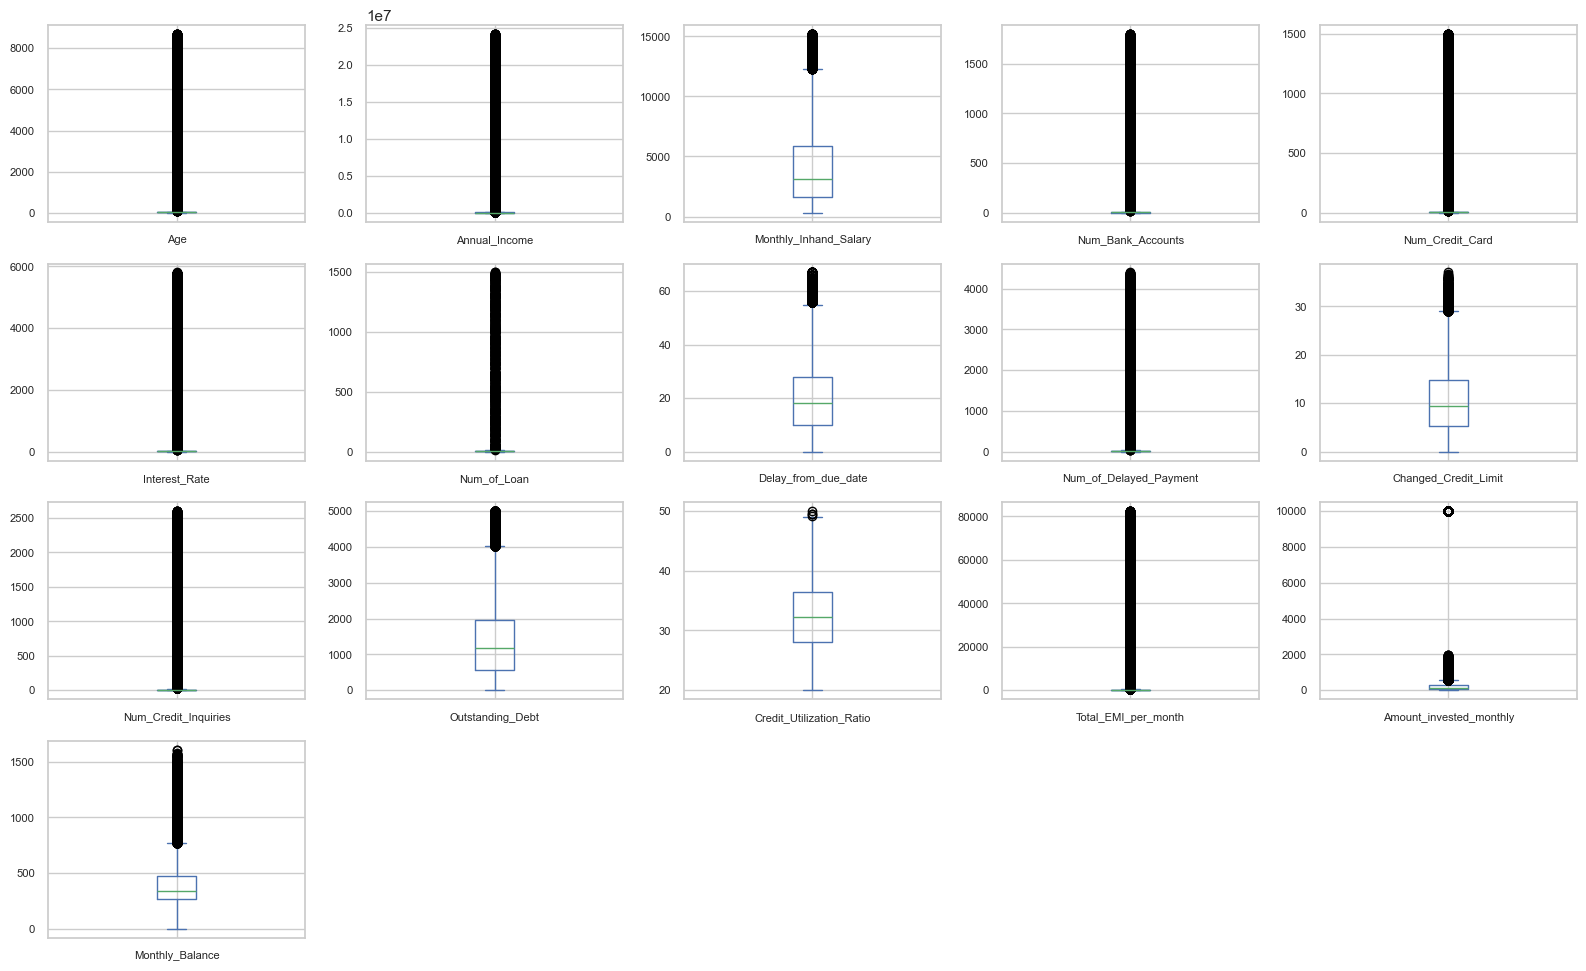

In [38]:
# exclude categorical data and creat a new datafarme to check the outliers
data_numric=data.select_dtypes(exclude='object')
#boxploting each feature
fig, axes = plt.subplots(figsize=(16, 12))
data_numric.plot(kind='box', subplots=True, layout=(5, 5), ax=axes, fontsize=8)
fig.tight_layout(pad=1.0)
plt.show()

In [39]:
def cap_outliers_iqr(data, columns=None):
    """
    Caps outliers in the specified columns of a DataFrame using the IQR method,
    directly modifying the original columns, and visualizes the changes.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        columns (list, optional): List of column names to apply outlier capping.
                                   If None, all numerical columns are used.

    Returns:
        pd.DataFrame: DataFrame with capped outlier columns.
    """

    # If no specific columns are provided, select numerical columns
    if columns is None:
        columns = data.select_dtypes(include=[np.number]).columns.tolist()

    # Create a copy of the original DataFrame to avoid modifying it directly
    data_capped = data.copy()

    for column in columns:
        # Calculate Q1, Q3, and IQR for the current column
        Q1 = data_capped[column].quantile(0.25)
        Q3 = data_capped[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Visualizing before capping
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=data_capped[column], color='lightblue')
        plt.title(f'{column} Distribution (Before Capping)')

        # Cap outliers directly in the original column
        data_capped[column] = np.where(data_capped[column] > upper_bound, upper_bound, data_capped[column])
        data_capped[column] = np.where(data_capped[column] < lower_bound, lower_bound, data_capped[column])

        # Visualizing after capping
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data_capped[column], color='lightgreen')
        plt.title(f'{column} Distribution (After Capping)')

        plt.tight_layout()
        plt.show()

    return data_capped

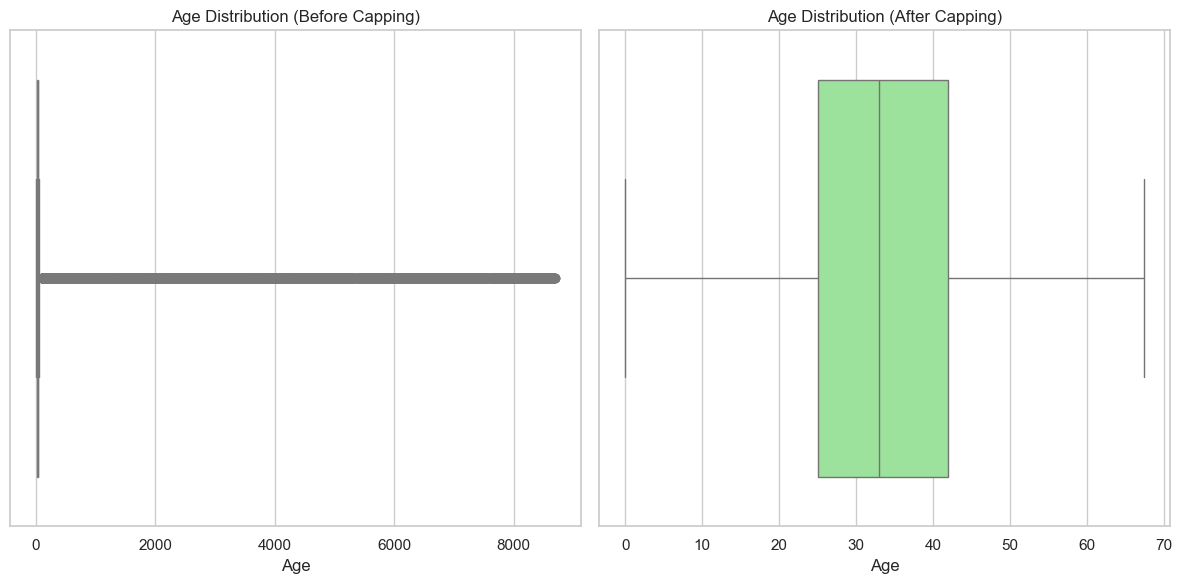

In [40]:
data= cap_outliers_iqr(data, columns=['Age'])

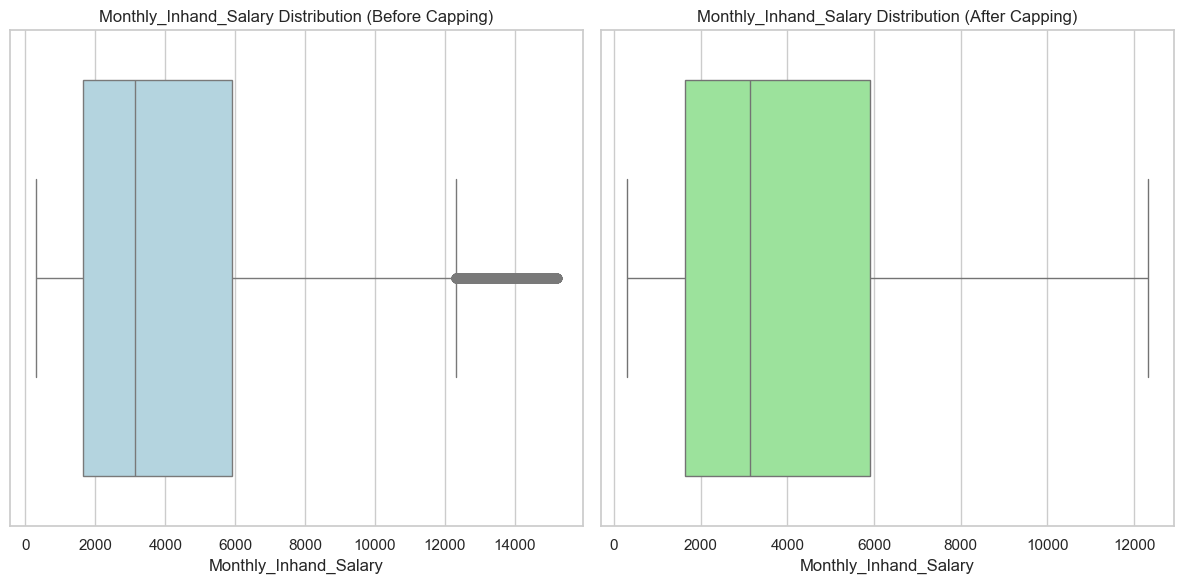

In [41]:
data=cap_outliers_iqr(data, columns=['Monthly_Inhand_Salary'])

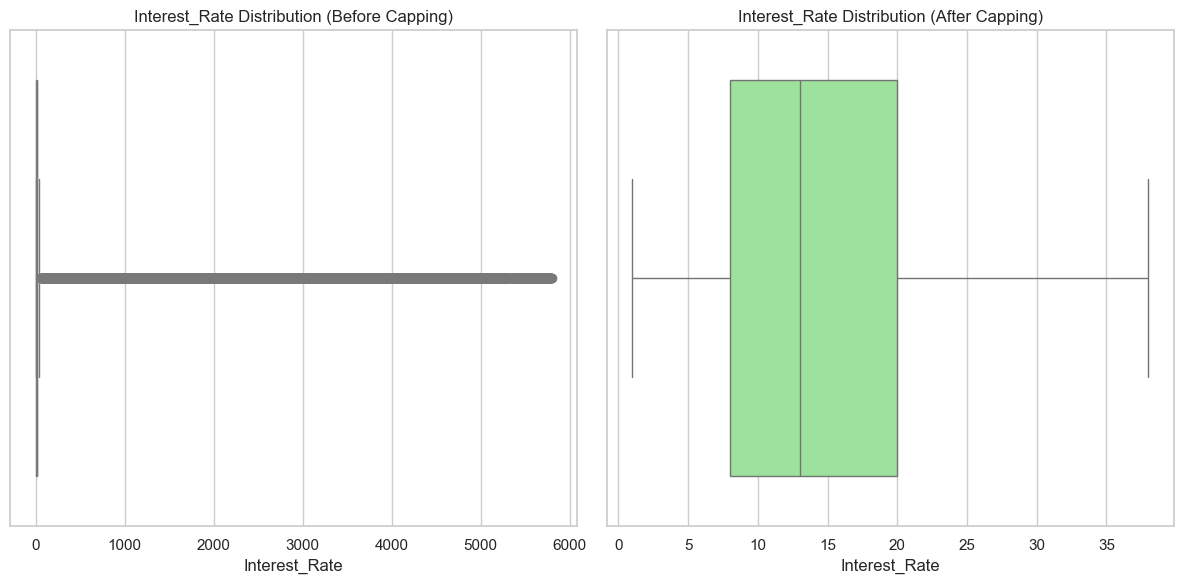

In [42]:
data=cap_outliers_iqr(data, columns=['Interest_Rate'])

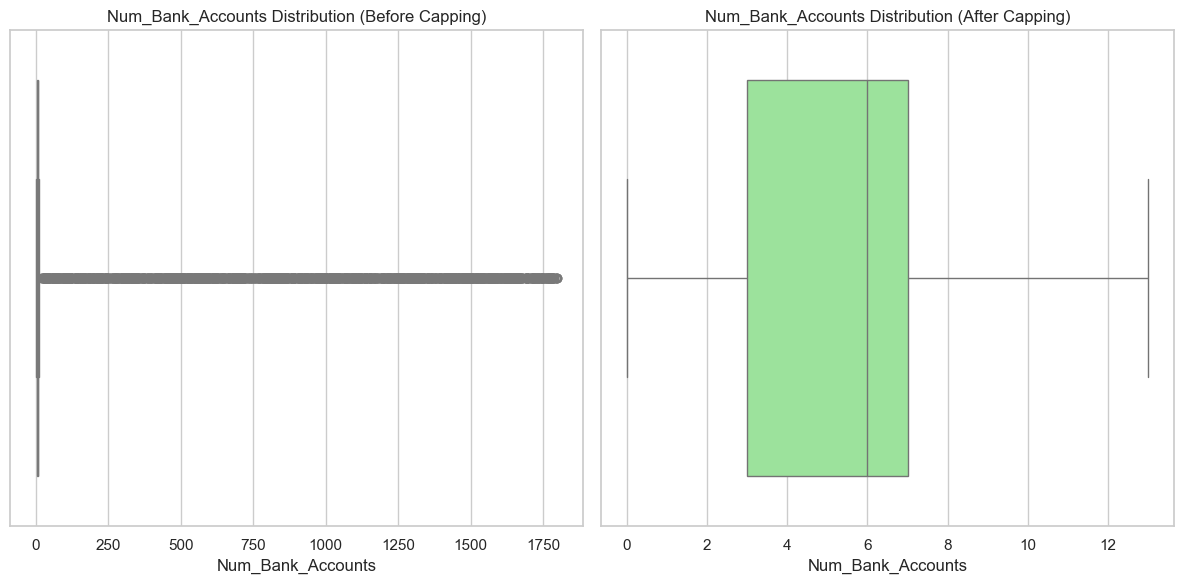

In [43]:
data=cap_outliers_iqr(data, columns=['Num_Bank_Accounts'])

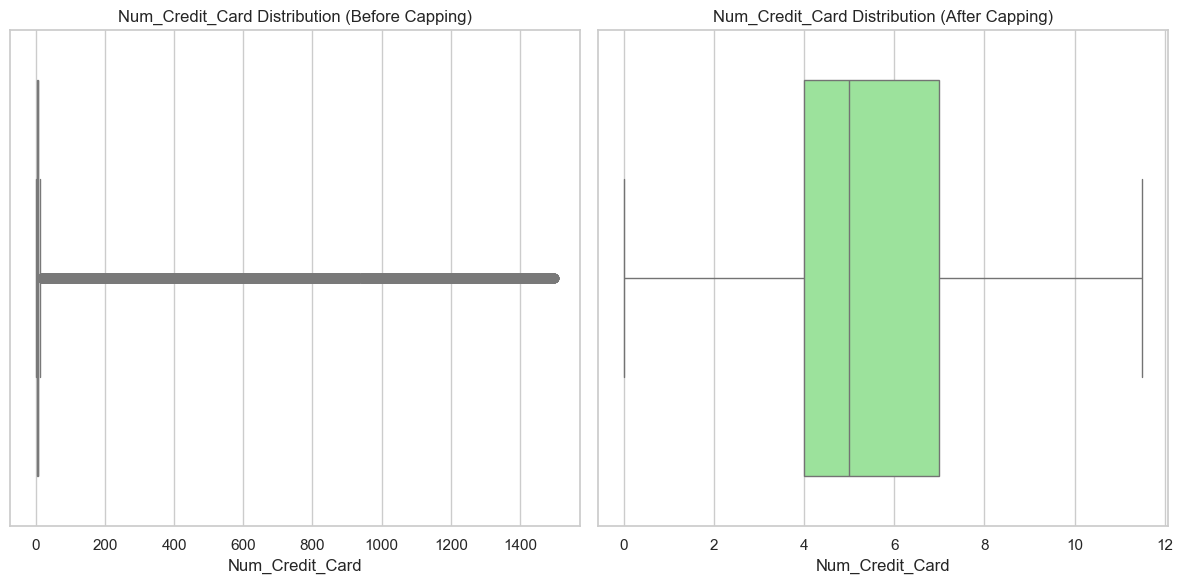

In [44]:
data=cap_outliers_iqr(data, columns=['Num_Credit_Card'])

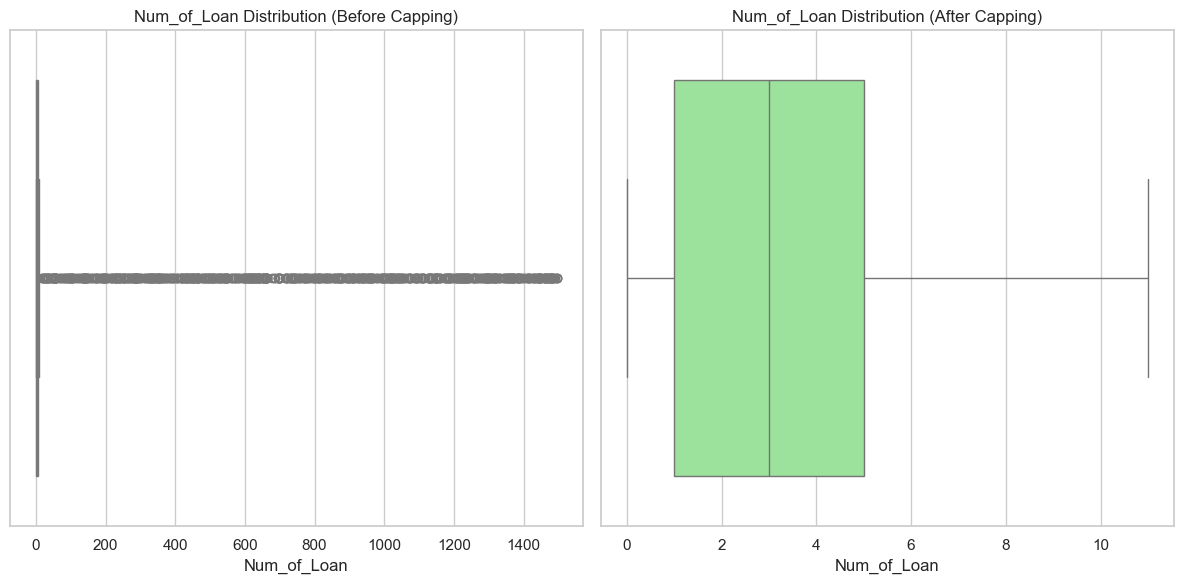

In [45]:
data=cap_outliers_iqr(data, columns=['Num_of_Loan'])

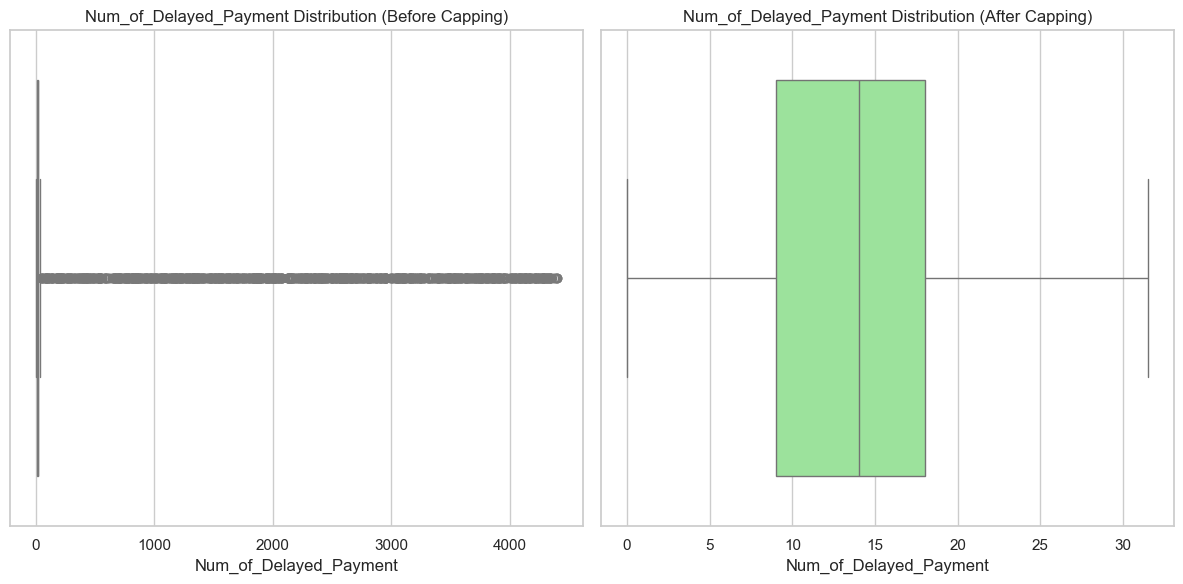

In [46]:
data=cap_outliers_iqr(data, columns=['Num_of_Delayed_Payment'])

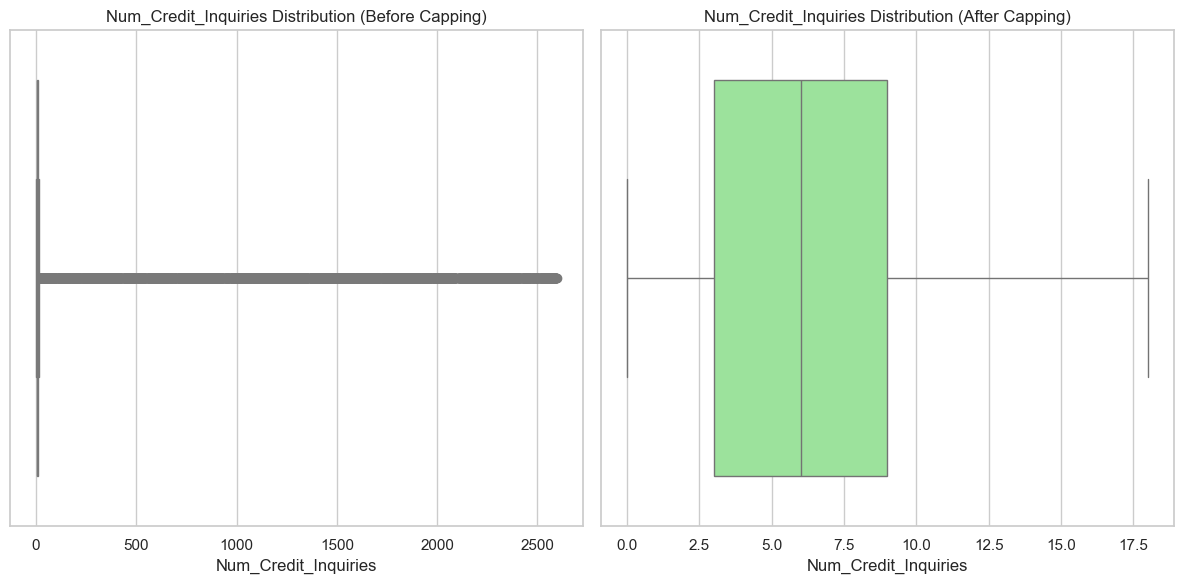

In [47]:
data=cap_outliers_iqr(data, columns=['Num_Credit_Inquiries'])

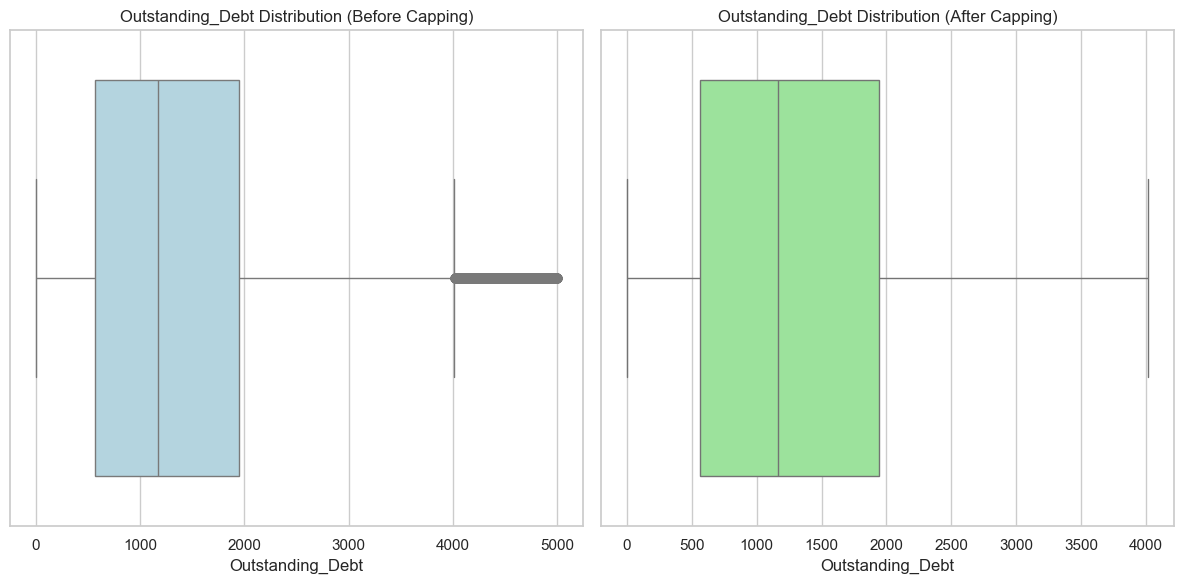

In [48]:
data=cap_outliers_iqr(data, columns=['Outstanding_Debt'])

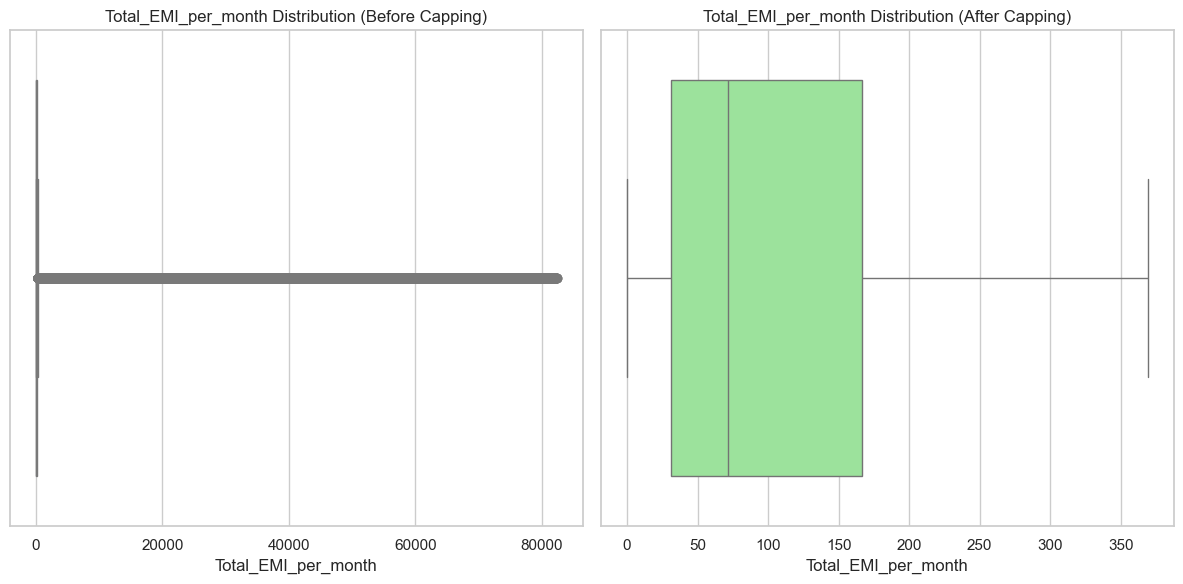

In [49]:
data=cap_outliers_iqr(data, columns=['Total_EMI_per_month'])

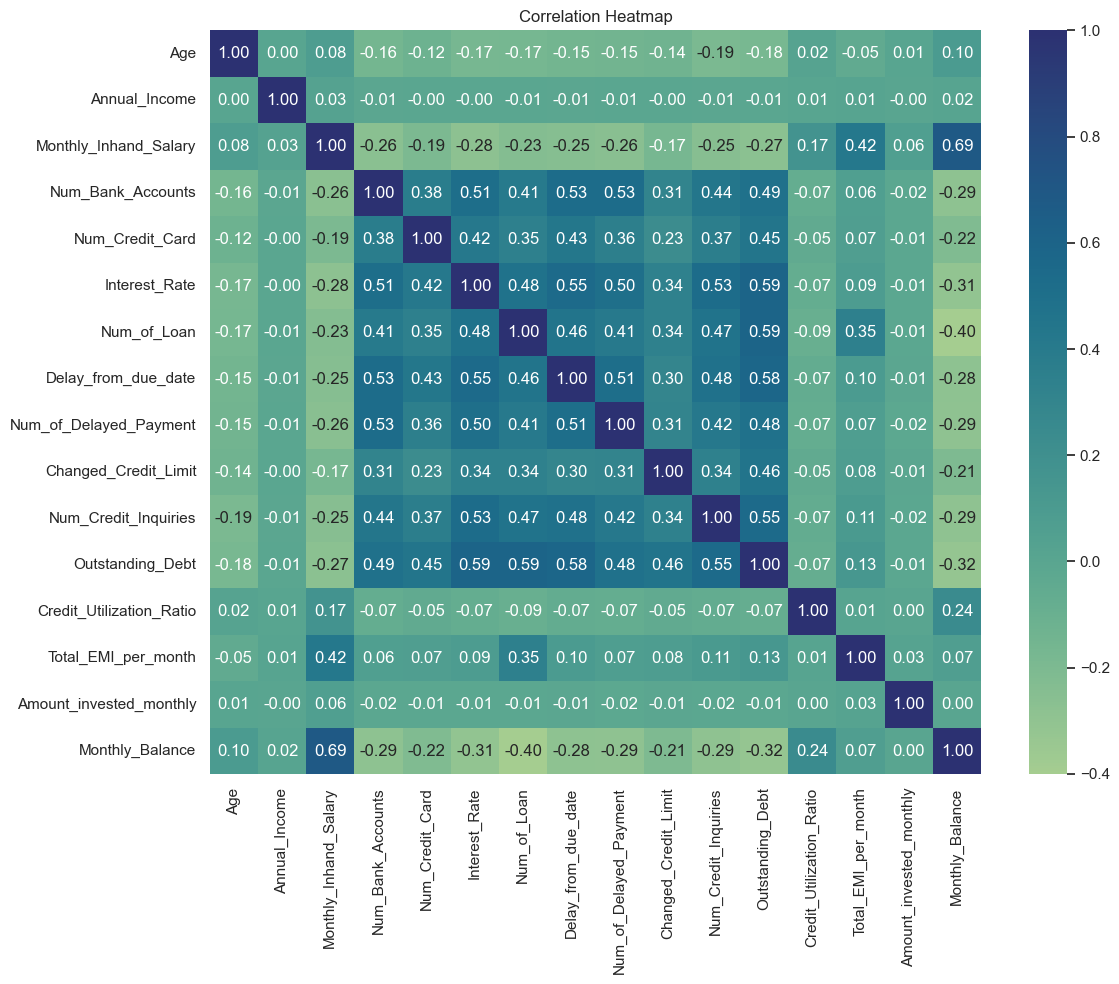

In [50]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap')
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
# Drop columns that are not useful for trainig model
# The 'Annual_Income' feature may not be useful for our analysis
# because it is correlated with 'Monthly_Inhand_Salary
columns_to_drop = ['ID', 'Month', 'Name', 'SSN','Credit_History_Age','Annual_Income']

data.drop(columns=columns_to_drop, inplace=True)

In [52]:
# Define a mapping for target encoding
status_mapping = {
    'Poor':0,
   'Standard':1,
   'Good':2
}

# Map STATUS to target categories
data['Credit_Score'] = data['Credit_Score'].map(status_mapping)

In [53]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding
LE=LabelEncoder() # Initialize Label Encoder

# List of columns to encode
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each specified column
for column in categorical_cols:
    data[column] = LE.fit_transform(data[column])

# Display the first few rows of the modified DataFrame
data.head()

,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,17.0,7,2706.161667,6.0,5.0,27.0,2.0,1,62,25.0,1.63,10.0,0,1562.91,26.612093,2,42.94109,244.750283,3,252.924793,1
CUS_0x1000,17.0,7,2706.161667,6.0,5.0,27.0,2.0,1,62,23.0,1.63,11.0,0,1562.91,29.439759,2,42.94109,176.132567,2,311.542510,0
CUS_0x1000,17.0,7,2706.161667,6.0,5.0,27.0,2.0,1,62,28.0,1.63,11.0,0,1562.91,38.285928,2,42.94109,109.056519,1,368.618557,0
CUS_0x1000,17.0,7,2706.161667,6.0,5.0,27.0,2.0,1,64,25.0,1.63,11.0,0,1562.91,32.843081,2,42.94109,87.909909,1,419.765167,0
CUS_0x1000,17.0,7,2706.161667,6.0,5.0,27.0,2.0,1,67,25.0,2.63,11.0,0,1562.91,32.330508,2,42.94109,191.834767,3,305.840309,0


In [54]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Separate features and target variable
X_selection= data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_selection, y)

# Display the new class distribution
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
Credit_Score
1    79114
0    43406
2    27480
Name: count, dtype: int64

Resampled class distribution:
Credit_Score
1    79114
0    79114
2    79114
Name: count, dtype: int64


In [55]:
from tensorflow.keras.utils import to_categorical
# Label Onehot-encoding 
y_Onehot = to_categorical(y_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_Onehot, test_size=0.25,stratify=y_Onehot, random_state=42)
np.save('X_test_CS.npy', X_test)
np.save('y_test_CS.npy', y_test)

In [57]:
from sklearn.preprocessing import MinMaxScaler
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(2048,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3,activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
)
# Evaluate the model on the test set
accuracy = model1.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

Epoch 1/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6559 - loss: 0.8271 - val_accuracy: 0.7140 - val_loss: 0.7319
Epoch 2/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7078 - loss: 0.7391 - val_accuracy: 0.7153 - val_loss: 0.7047
Epoch 3/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7106 - loss: 0.7247 - val_accuracy: 0.7164 - val_loss: 0.7003
Epoch 4/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7121 - loss: 0.7191 - val_accuracy: 0.7207 - val_loss: 0.6884
Epoch 5/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7148 - loss: 0.7072 - val_accuracy: 0.7236 - val_loss: 0.6878
Epoch 6/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7144 - loss: 0.7056 - val_accuracy: 0.7244 - val_loss: 0.6719
Epoch 7/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7190 - loss: 0.6911 - val_accuracy: 0.7305 - val_loss: 0.6644
Epoch 8/200
696/696 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7219 - loss: 0

In [64]:
model1.save('CS.keras')